In [5]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size, get_ordered_colors
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import glob

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')


In [6]:
def calc_entropy(l):
    abs_l = np.abs(l)[np.abs(l) > 0]
    per_l = abs_l / np.sum(abs_l)
    return -np.dot(np.log(per_l), per_l)

def normalize(x):
    x_ = np.array(x)
    x_ = (x_ - np.mean(x_))
    return x_ / np.std(x_)

def extract_kernel(w):
    kernel = np.zeros((w.shape[0], w.shape[1] * 2), dtype=float)
    for i in range(0, w.shape[0]):
        a = slice((w.shape[1]-i), w.shape[1], 1)
        kernel[i, a] = w[i, :i]
        b = slice(w.shape[1], 2 * w.shape[1] - i, 1)
        kernel[i, b] = w[i, i:]
    return kernel

def sort_key(s):
    idx_loc = s.find('INDEX_') + 6
    s_trunc = s[idx_loc:]
    idx_und = s_trunc.find('_')
    return int(s_trunc[:idx_und])

In [61]:
def graph_perturbation_traj(dir_path, n_e=25, n_i=8):
    
    T = 0.11 # Total duration of one network simulation
    dt = 1e-4 # Timestep
    t = np.linspace(0, T, int(T / dt)-1)
        
    weights_path = os.path.join('./sims_out', dir_path, 'weights', '*')
    dynamics_path = os.path.join('./sims_out', dir_path, 'dynamics', '*')
    
    last_batch_idx = None
    
    cached_weights = []
    cached_dynamics = []

    for i, (weights_path_i, dynamics_path_i) in enumerate(zip(sorted(glob.glob(weights_path)), sorted(glob.glob(dynamics_path)))):
        batch_idx_loc = weights_path_i.find('batch')
        batch_idx = int(weights_path_i[batch_idx_loc + 6:batch_idx_loc + 8])
        
        activation_idx_loc = weights_path_i.find('activ')
        activation_idx = int(weights_path_i[activation_idx_loc + 6:activation_idx_loc + 9])
        
        
        if last_batch_idx is None or last_batch_idx != batch_idx:
            last_batch_idx = batch_idx
            
            layer_colors = get_ordered_colors('gist_rainbow', 10)
        
            scale = 2
            fig, axs = plt.subplots(1, 1, figsize=(3 * scale, 6 * scale))
            axs.set_yticks(np.arange(n_e))
            axs.set_yticklabels(np.arange(n_e))
            
            fig_w, axs_w = plt.subplots(1, 1, figsize=(3 * scale, 6 * scale))
            
            
            
        
        
        if last_batch_idx != batch_idx:
            pass
        else:
            r = read_csv(dynamics_path_i, read_header=False, delimiter=',')
            r = np.array(r)
            
            r_exc = r[:, :n_e]
            r_summed = np.sum(r_exc, axis=0)
            r_active_mask =  np.where(r_summed != 0, 1, 0).astype(bool)
            r_summed_safe_divide = np.where(r_active_mask, r_summed, 1)
            r_normed = r_exc / r_summed_safe_divide
            t_means = np.sum(t.reshape(t.shape[0], 1) * r_normed, axis=0)
            t_ordering = np.argsort(t_means)
            t_ordering = np.concatenate([t_ordering, np.arange(n_e, n_e + n_i)])
            
            r = r[:, t_ordering]
            
            for cell_idx in range(n_e):
                r_idx = r[:, cell_idx]
                axs.plot(t, r_idx + 0.3 * (cell_idx), c=layer_colors[activation_idx % len(layer_colors)])
                
            w = read_csv(weights_path_i, read_header=False, delimiter=',')
            w = np.array(w)
            
            w_e_e = w[:n_e, :n_e]
            summed_e_inputs = np.sum(w_e_e, axis=1)
            
            axs_w.plot(np.arange(n_e), summed_inputs, c=layer_colors[activation_idx % len(layer_colors)])

            
            
            
            
            
            
        
        
        
        
        


[[ 1.44051108e-01  0.00000000e+00  1.98441565e+00 ... -1.28969747e+00
  -1.91838331e+00  0.00000000e+00]
 [ 1.36236341e-01  2.80281167e-07  0.00000000e+00 ... -9.99932247e-01
  -1.14013475e+00 -1.52408545e+00]
 [ 6.00377754e-01  1.30016674e-03  5.15058287e-04 ... -1.85189309e+00
  -1.79624133e+00 -2.02998005e+00]
 ...
 [ 1.34603285e+00  8.28748020e-01  1.08607928e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.24303033e+00  6.77956474e-01  9.69885063e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.37104260e+00  5.76825926e-01  8.57849512e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 1.36787471e-01  0.00000000e+00  1.97806222e+00 ... -1.29366915e+00
  -1.93593529e+00  0.00000000e+00]
 [ 1.34185480e-01  2.80281167e-07  0.00000000e+00 ... -9.95482000e-01
  -1.13787067e+00 -1.51781991e+00]
 [ 5.74793416e-01  1.54056175e-03  1.26595102e-03 ... -1.89682043e+00
  -1.82025666e+00 -2.07169357e+00]
 ...
 [ 1.34478035e+00  8.36341323e-01  1.0936936

[[ 7.40807224e-02  0.00000000e+00  3.10957677e+00 ... -1.75909733e+00
  -2.72130007e+00 -1.76466269e+00]
 [ 6.57785009e-02  6.48789241e-01  0.00000000e+00 ... -1.88051687e+00
  -1.98969024e+00  0.00000000e+00]
 [ 8.12411097e-06  1.19503799e+00  8.36644140e-01 ... -2.69071619e+00
  -1.67936905e+00 -1.71662919e+00]
 ...
 [ 1.17628098e+00  6.98966754e-01  5.63487195e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.27994219e+00  5.63165323e-01  5.76668568e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.22514782e+00  7.84222131e-01  6.52818384e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 7.06121140e-02  0.00000000e+00  3.16495953e+00 ... -1.77260564e+00
  -2.72899174e+00 -1.76647652e+00]
 [ 6.07843853e-02  6.32941497e-01  0.00000000e+00 ... -1.90639983e+00
  -1.99481766e+00  0.00000000e+00]
 [ 1.03322979e-05  1.19011482e+00  8.31451254e-01 ... -2.69872027e+00
  -1.67788690e+00 -1.71607730e+00]
 ...
 [ 1.16779242e+00  6.91877470e-01  5.5853436

[[ 1.00377307e-01  0.00000000e+00  3.12556447e+00 ... -1.79175444e+00
  -1.60460021e+00 -2.20802896e+00]
 [ 1.28957555e-01  5.22545543e-01  0.00000000e+00 ... -1.33449903e+00
  -1.09922427e+00 -1.90894293e+00]
 [ 1.67822699e-05  1.63094182e+00  2.70980947e+00 ... -2.05095286e+00
  -1.74876736e+00 -2.74271350e+00]
 ...
 [ 1.11073602e+00  4.93177554e-01  7.50900180e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.69647185e-01  9.32941773e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.13062424e-01  6.00530091e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 9.40426380e-02  0.00000000e+00  3.13091788e+00 ... -1.79235852e+00
  -1.62022082e+00 -2.22277007e+00]
 [ 1.28011905e-01  5.17777554e-01  0.00000000e+00 ... -1.32163095e+00
  -1.09067297e+00 -1.90176783e+00]
 [ 1.40924681e-05  1.64012176e+00  2.69187209e+00 ... -2.05945852e+00
  -1.77392041e+00 -2.76640569e+00]
 ...
 [ 1.12204657e+00  5.04082031e-01  7.6114248

[[ 4.25902016e-01  0.00000000e+00  1.34672908e-03 ... -1.75290088e+00
   0.00000000e+00 -2.42763398e+00]
 [ 2.32677459e-08  1.62574101e-06  0.00000000e+00 ... -2.33687598e+00
  -3.03975758e+00  0.00000000e+00]
 [ 1.23429842e-05  8.38044013e-07  1.91631850e-07 ... -1.99962567e+00
   0.00000000e+00 -2.58150066e+00]
 ...
 [ 1.32227922e+00  9.45065952e-01  1.00243466e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.11126602e+00  8.49591272e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.29375254e+00  6.70683246e-01  8.10019888e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 4.17743438e-01  0.00000000e+00  1.09978876e-03 ... -1.77368866e+00
   0.00000000e+00 -2.42895700e+00]
 [ 2.32677459e-08  1.62574101e-06  0.00000000e+00 ... -2.33991789e+00
  -3.03494655e+00  0.00000000e+00]
 [ 2.38853235e-03  8.38044013e-07  1.91631850e-07 ... -1.98660104e+00
   0.00000000e+00 -2.55479994e+00]
 ...
 [ 1.31785350e+00  9.41204060e-01  9.9800833

[[ 1.36835920e+00  0.00000000e+00  8.60304016e-04 ... -1.76360051e+00
   0.00000000e+00 -2.87718301e+00]
 [ 4.40335710e-02  6.39030021e-07  0.00000000e+00 ... -2.24790723e+00
   0.00000000e+00 -1.87106370e+00]
 [ 1.01791854e-01  6.85045135e-07  2.29172296e+00 ...  0.00000000e+00
  -1.34246237e+00  0.00000000e+00]
 ...
 [ 1.34324882e+00  5.58435085e-01  8.06667171e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.32523530e+00  4.42383901e-01  6.88785396e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.26528104e+00  4.43162736e-01  7.68051783e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 1.34983234e+00  0.00000000e+00  9.74879193e-04 ... -1.81161646e+00
   0.00000000e+00 -2.91078317e+00]
 [ 3.87052927e-02  6.39030021e-07  0.00000000e+00 ... -2.27310078e+00
   0.00000000e+00 -1.87347558e+00]
 [ 8.86331388e-02  6.85045135e-07  2.27207709e+00 ...  0.00000000e+00
  -1.35781494e+00  0.00000000e+00]
 ...
 [ 1.32908922e+00  5.53640336e-01  7.9363710

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fb26c88f280> (for post_execute):


KeyboardInterrupt: 

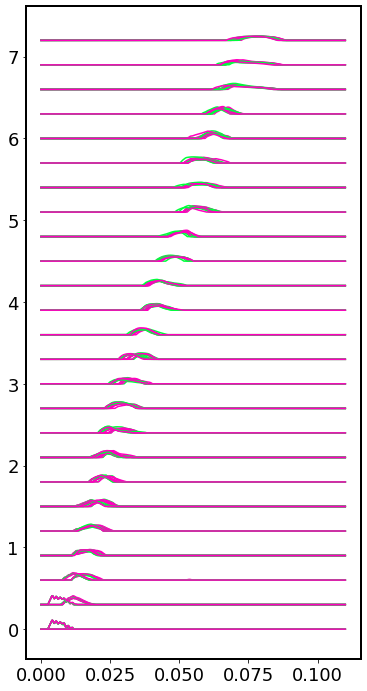

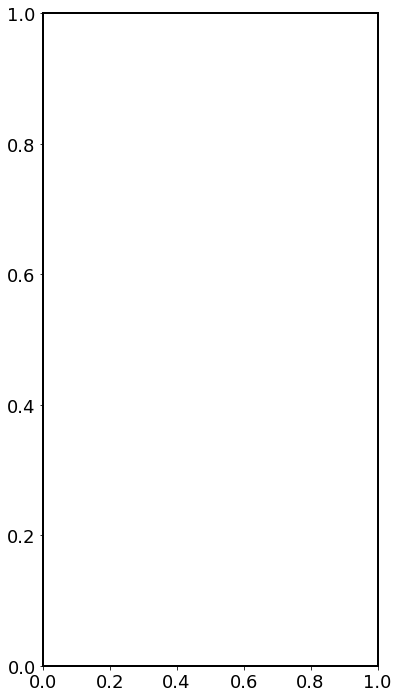

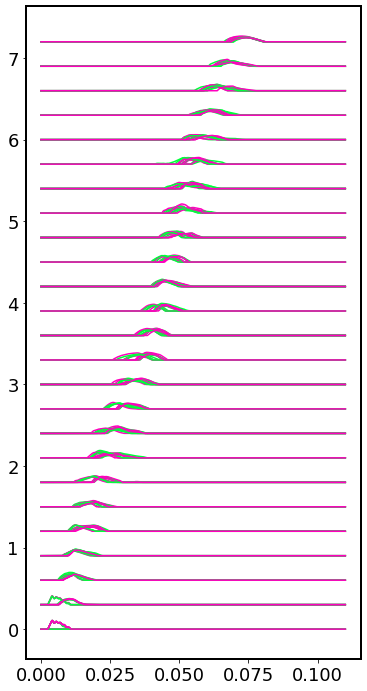

Error in callback <function flush_figures at 0x7fb26c8ae670> (for post_execute):


KeyboardInterrupt: 

In [62]:
graph_perturbation_traj('stress_test_single_cell_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_500_2024-03-15_15:58:14.626790')